<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/Fruit_Classification_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit Classification
- <i>Fresh bananas
- Fresh oranges
- Rotten apples
- Fresh apples
- Rotten bananas
- Rotten oranges</i>

# Different DNN used in this Project are

- <i>Convolutional Neural Network
- <i>ResNet50
- <i>VGG 16
- <i>VGG 19
- <i>InceptionResNetV2

In [101]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers

In [145]:
names = os.listdir("/content/drive/MyDrive/fruit dataset")
print("Name of the Fruits and Category \n", names[0:6])

Name of the Fruits and Category 
 ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']


Text(0.5, 1.0, 'Rotten Apple')

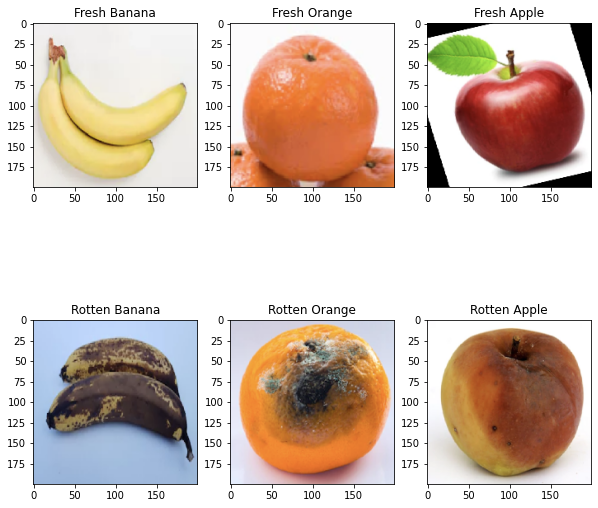

In [150]:
images = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
#Fresh Fruits
plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.imshow(images[0])
plt.title("Fresh Banana")
plt.subplot(2, 3, 2)
plt.imshow(images[130])
plt.title("Fresh Orange")
plt.subplot(2,3,3)
plt.imshow(images[470])
plt.title("Fresh Apple")

#Rotten Fruits
plt.subplot(2,3,4)
plt.imshow(images[660])
plt.title("Rotten Banana")
plt.subplot(2,3,5)
plt.imshow(images[830])
plt.title("Rotten Orange")
plt.subplot(2,3,6)
plt.imshow(images[290])
plt.title("Rotten Apple")


(850, 200, 200, 3)
(850,)


In [4]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)


(850, 200, 200, 3)
(850,)


In [5]:
y = to_categorical(y)
print(y.shape)

(850, 6)


In [6]:
x = x/255

# CNN

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

- Shape of Training and Testing Sets

In [8]:
print('X_train :',xtrain.shape)
print('X_test  :',xtest.shape)
print('Y_train :',ytrain.shape)
print('Y_test  :',xtest.shape)

X_train : (680, 200, 200, 3)
X_test  : (170, 200, 200, 3)
Y_train : (680, 6)
Y_test  : (170, 200, 200, 3)


- Sequential Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(80,(3,3),activation='relu'))
# model.add(layers.Conv2D(100,(3,3),activation='relu'))
# model.add(layers.Conv2D(120,(3,3),activation='relu'))
# model.add(layers.Conv2D(140,(3,3),activation='relu'))
# model.add(layers.Conv2D(160,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(180,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(#rescale=1./255, #Scale the image between 0 and 1
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 )


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255
                                   )
val_datagen = ImageDataGenerator(rescale=1./255
                                 )

In [42]:
#Create the image generators
batch_size = 32
train_generator = train_datagen.flow(xtrain, ytrain, batch_size=batch_size)
val_generator = val_datagen.flow(xtest, ytest, batch_size=batch_size)


In [14]:
ntrain = len(xtrain)
nval = len(xtest)
print(ntrain)
print(nval)


680
170


In [15]:
# Function for plots images with labels within jupyter notebook
# def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(cols, rows, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=12)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')
#Check the training set (with batch of 10 as defined above
# imgs, labels = next(train_generator)
# #Images are shown in the output
# plots(imgs, titles=labels)
# #Images Classes with index

# print(train_generator.index_generator)

In [16]:
history = model.fit_generator(train_generator,
 steps_per_epoch=ntrain // batch_size,
 epochs=20,
 validation_data=val_generator,
 validation_steps=nval // batch_size)


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


21/21 [==============================] - 37s 132ms/step - loss: 1.7920 - accuracy: 0.1583 - val_loss: 1.7912 - val_accuracy: 0.1875
Epoch 2/20
21/21 [==============================] - 2s 86ms/step - loss: 1.7918 - accuracy: 0.1622 - val_loss: 1.7915 - val_accuracy: 0.2062
Epoch 3/20
21/21 [==============================] - 2s 86ms/step - loss: 1.7920 - accuracy: 0.1481 - val_loss: 1.7913 - val_accuracy: 0.1688
Epoch 4/20
21/21 [==============================] - 2s 86ms/step - loss: 1.7915 - accuracy: 0.1790 - val_loss: 1.7918 - val_accuracy: 0.1500
Epoch 5/20
21/21 [==============================] - 2s 87ms/step - loss: 1.7916 - accuracy: 0.1746 - val_loss: 1.7916 - val_accuracy: 0.1500
Epoch 6/20
21/21 [==============================] - 2s 87ms/step - loss: 1.7923 - accuracy: 0.1409 - val_loss: 1.7922 - val_accuracy: 0.1500
Epoch 7/20
21/21 [==============================] - 2s 90ms/step - loss: 1.7924 - accuracy: 0.1660 - val_loss: 1.7912 - val_accuracy: 0.1625
Epoch 8/20
21/21 [====

In [31]:
test_score = model.evaluate_generator(val_generator, batch_size)
print("\n\n")
print("------------------------------------------")
print("CNN - Validation Accuracy : ",history.history['val_accuracy'][-1]*100,"%" )
print("CNN - Validation Loss: ",history.history['val_loss'][-1])
print("------------------------------------------")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '





------------------------------------------
CNN - Validation Accuracy :  14.374999701976776 %
CNN - Validation Loss:  1.792235016822815
------------------------------------------


In [ ]:
# import cv2
# import keras
# model.save("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN.hdf5")
# #Test the model
# img_rows = 250
# img_cols = 250
# model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN.hdf5')
# file = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/test1.png'
# img = cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (img_rows,img_cols))
# test_image = image.img_to_array(img)
# test_image = np.expand_dims(test_image, axis=0)
# pred = model.predict(test_image)
# print(pred, labels[np.argmax(pred)])

#Plot model Accuracy and Loss

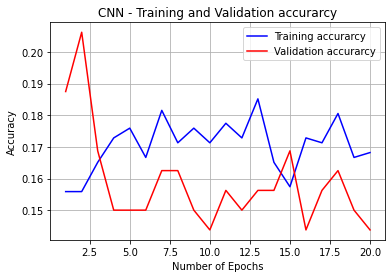

In [32]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN_Accuracy.png")

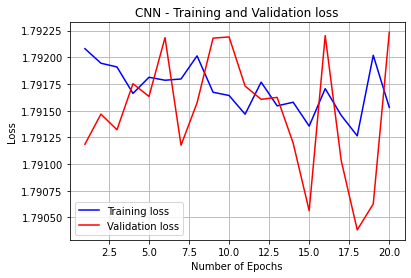

In [33]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/CNN_Loss.png")


In [ ]:
# Y_pred = model.predict(xtest)
# # #y_pred = np.argmax(Y_pred, axis=1) - used for multiclass
# # y_pred = (Y_pred > 0.5) * 1.0
# # y_pred = y_pred.reshape(ytest.shape)
# print(Y_pred.shape)
# # y_pred.sum()
# print(Y_pred[10])
# y_pred = (Y_pred > 0.5) * 1.0
# y_pred = y_pred.reshape(ytest.shape)
# print(y_pred)


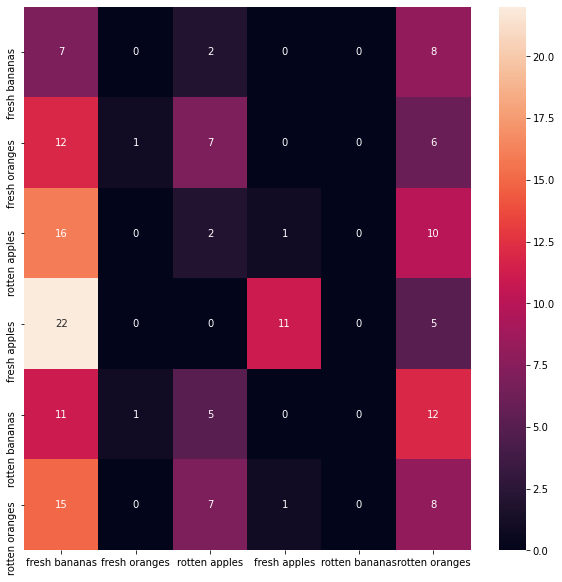

[[ 7  0  2  0  0  8]
 [12  1  7  0  0  6]
 [16  0  2  1  0 10]
 [22  0  0 11  0  5]
 [11  1  5  0  0 12]
 [15  0  7  1  0  8]]


In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)

In [36]:
# #confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# y_pred=model.predict(xtest)
# y_pred_classes=np.argmax(y_pred,axis=1)
# y_true=np.argmax(ytest,axis=1)
# #compute conf mat
# conf_mat=confusion_matrix(y_true,y_pred_classes)
# #plot the con mat
# fruit_names=['fresh bananas',
#  'fresh oranges',
#  'rotten apples',
#  'fresh apples',
#  'rotten bananas',
#  'rotten oranges']
# f,ax=plt.subplots(figsize=(10,9))
# sns.heatmap(conf_mat,annot=True,fmt='.0f')
# ax.set_xticklabels(fruit_names)
# ax.set_yticklabels(fruit_names)
# plt.show()

In [37]:
import sklearn.metrics as metrics
target_names = ['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
Y_pred = model.predict_generator(val_generator, 2513 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(val_generator.index_array, y_pred)
print(cm)
print('Classification Report')
print(metrics.classification_report(val_generator.index_array, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.01      1.00      0.01         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.figure(figsize=(10,10))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         cm = np.around(cm, decimals=2)
#         cm[np.isnan(cm)] = 0.0
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# ResNet50

In [151]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
#new_model.summary()
input_layer = layers.Input(shape=(200,200,3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()
last_layer = model2.output
flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)
new_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()
for layer in new_model.layers[:-1]:
 layer.trainable=False
#new_model.summary()

In [152]:
x = []
y = []

for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
y = to_categorical(y)
print(y.shape)
x = x/255


(850, 200, 200, 3)
(850,)
(850, 6)


In [153]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [154]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 6s 151ms/step - loss: 11.3341 - accuracy: 0.2232 - val_loss: 4.4001 - val_accuracy: 0.4824
Epoch 2/20
22/22 [==============================] - 2s 114ms/step - loss: 4.1491 - accuracy: 0.4154 - val_loss: 2.7786 - val_accuracy: 0.5412
Epoch 3/20
22/22 [==============================] - 2s 114ms/step - loss: 1.8279 - accuracy: 0.5641 - val_loss: 1.3812 - val_accuracy: 0.5235
Epoch 4/20
22/22 [==============================] - 2s 114ms/step - loss: 1.2813 - accuracy: 0.5909 - val_loss: 1.0528 - val_accuracy: 0.5706
Epoch 5/20
22/22 [==============================] - 2s 114ms/step - loss: 0.8572 - accuracy: 0.6989 - val_loss: 0.9075 - val_accuracy: 0.6471
Epoch 6/20
22/22 [==============================] - 2s 114ms/step - loss: 0.8071 - accuracy: 0.7063 - val_loss: 1.3416 - val_accuracy: 0.5412
Epoch 7/20
22/22 [==============================] - 2s 114ms/step - loss: 0.7728 - accuracy: 0.6963 - val_loss: 0.7451 - val_accuracy: 0.7235
Epoch

#Plotting Model Accuracy and loss graph

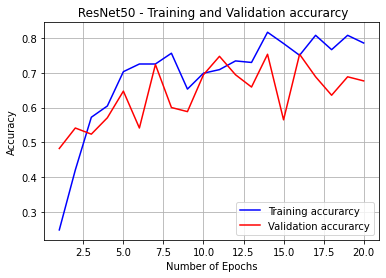

In [155]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title(' ResNet50 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/ResNet50_accuracy.png")

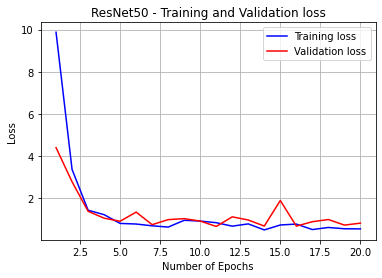

In [156]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('ResNet50 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/Resnet50_Loss.png")

In [157]:
# #Confution Matrix and Classification Report
# Y_pred = model2.predict_generator(val_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix())
# print('Classification Report')
# target_names = ['Cats', 'Dogs', 'Horse']
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [158]:
# #confusion matrix
# y_pred=model2.predict(xtest)
# # y_pred_classes=np.argmax(y_pred,axis=1)
# y_true=np.argmax(ytest)
# #compute conf mat
# conf_mat=confusion_matrix(y_true,y_pred)

# print(conf_mat)
# #plot the con mat
# # fruit_names=['fresh bananas',
# #  'fresh oranges',
# #  'rotten apples',
# #  'fresh apples',
# #  'rotten bananas',
# #  'rotten oranges']
# # f,ax=plt.subplots(figsize=(10,9))
# # sns.heatmap(conf_mat,annot=True,fmt='.0f')
# # ax.set_xticklabels(fruit_names)
# # ax.set_yticklabels(fruit_names)
# # plt.show()

# VGG16

In [159]:
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 5s 0us/step


In [160]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [161]:
from keras.utils.vis_utils import plot_model

In [162]:
#plot_model(model3, to_file='vgg.png')

In [163]:
input_layer = layers.Input(shape=(200,200,3))

In [164]:
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)

58892288/58889256 [==============================] - 1s 0us/step


In [165]:
print(model3.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [166]:

last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [167]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [168]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [169]:
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 13s 320ms/step - loss: 1.2378 - accuracy: 0.5392 - val_loss: 0.2587 - val_accuracy: 0.9118
Epoch 2/20
22/22 [==============================] - 3s 136ms/step - loss: 0.1432 - accuracy: 0.9631 - val_loss: 0.1699 - val_accuracy: 0.9294
Epoch 3/20
22/22 [==============================] - 3s 136ms/step - loss: 0.0678 - accuracy: 0.9867 - val_loss: 0.1520 - val_accuracy: 0.9471
Epoch 4/20
22/22 [==============================] - 3s 137ms/step - loss: 0.0455 - accuracy: 0.9918 - val_loss: 0.1424 - val_accuracy: 0.9588
Epoch 5/20
22/22 [==============================] - 3s 137ms/step - loss: 0.0350 - accuracy: 0.9970 - val_loss: 0.1525 - val_accuracy: 0.9471
Epoch 6/20
22/22 [==============================] - 3s 136ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 0.1413 - val_accuracy: 0.9529
Epoch 7/20
22/22 [==============================] - 3s 136ms/step - loss: 0.0215 - accuracy: 0.9997 - val_loss: 0.1287 - val_accuracy: 0.9529
Epoch

# Plotting Model Accuracy and Loss

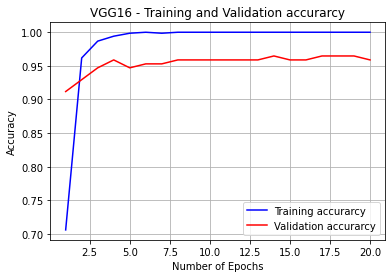

In [170]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG16 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Accuracy.png")

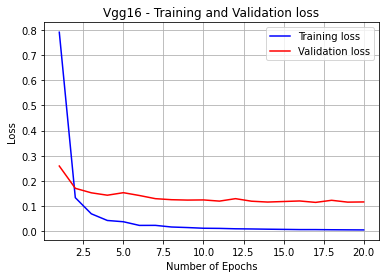

In [171]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Vgg16 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Loss.png")

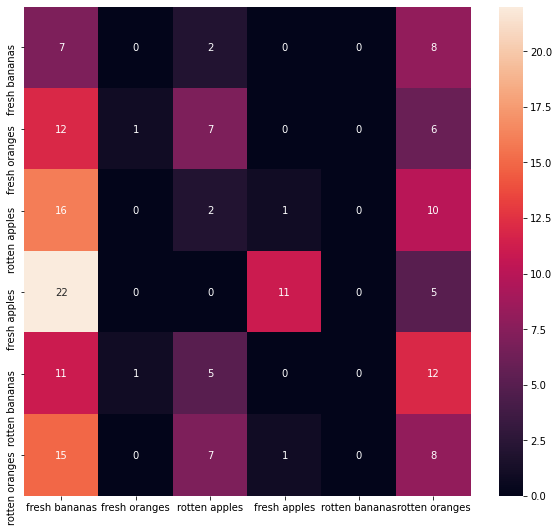

In [172]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

#VGG 19


In [173]:
from keras.applications.vgg19 import VGG19
model4 = VGG19(weights='imagenet')

574717952/574710816 [==============================] - 4s 0us/step


In [174]:
#print(model3.summary())

In [175]:
input_layer = layers.Input(shape=(200,200,3))
model4 = VGG19(weights='imagenet',include_top=False,input_tensor=input_layer)


80142336/80134624 [==============================] - 1s 0us/step


In [176]:
#print(model3.summary())

In [177]:

last_layer = model4.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False

In [178]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 4s 176ms/step - loss: 1.4163 - accuracy: 0.4965 - val_loss: 0.4167 - val_accuracy: 0.8471
Epoch 2/20
22/22 [==============================] - 4s 167ms/step - loss: 0.2048 - accuracy: 0.9295 - val_loss: 0.2208 - val_accuracy: 0.9176
Epoch 3/20
22/22 [==============================] - 4s 167ms/step - loss: 0.0875 - accuracy: 0.9859 - val_loss: 0.2257 - val_accuracy: 0.9118
Epoch 4/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0636 - accuracy: 0.9888 - val_loss: 0.1708 - val_accuracy: 0.9294
Epoch 5/20
22/22 [==============================] - 4s 169ms/step - loss: 0.0464 - accuracy: 0.9906 - val_loss: 0.1711 - val_accuracy: 0.9294
Epoch 6/20
22/22 [==============================] - 4s 168ms/step - loss: 0.0409 - accuracy: 0.9911 - val_loss: 0.1603 - val_accuracy: 0.9235
Epoch 7/20
22/22 [==============================] - 4s 169ms/step - loss: 0.0258 - accuracy: 0.9974 - val_loss: 0.1477 - val_accuracy: 0.9294
Epoch 

#Plotting Model Accuracy and Loss

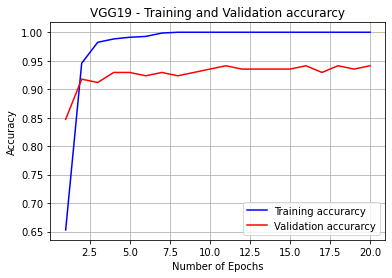

In [179]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG19 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Accuracy.png")

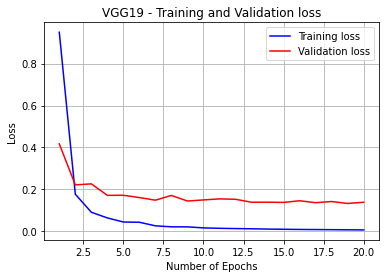

In [180]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('VGG19 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Loss.png")

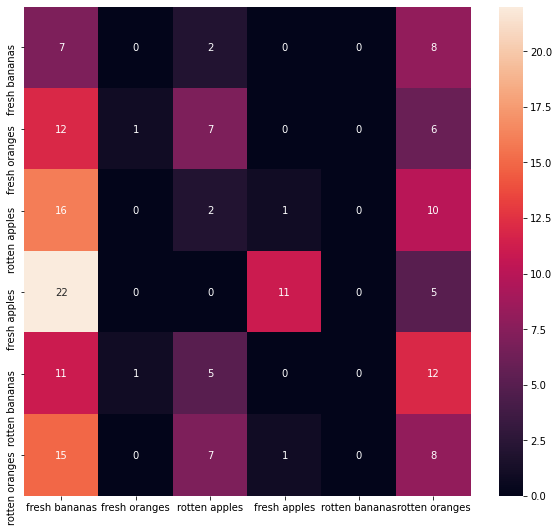

In [181]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

#InceptionResNetV2

In [182]:
import tensorflow as tf

In [183]:
input_layer = layers.Input(shape=(200,200,3))
model5 = tf.keras.applications.InceptionResNetV2(weights='imagenet',
    include_top=False,input_tensor=input_layer)

219062272/219055592 [==============================] - 2s 0us/step


In [184]:
#model5.summary()

In [185]:

last_layer = model5.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in new_model.layers[:-1]:
  layer.trainable=False
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = new_model.fit(xtrain,ytrain,batch_size=32,epochs=20,validation_data=(xtest,ytest))


Epoch 1/20
22/22 [==============================] - 17s 388ms/step - loss: 3.6363 - accuracy: 0.6152 - val_loss: 1.4144 - val_accuracy: 0.8941
Epoch 2/20
22/22 [==============================] - 4s 170ms/step - loss: 0.4282 - accuracy: 0.9623 - val_loss: 0.4792 - val_accuracy: 0.9118
Epoch 3/20
22/22 [==============================] - 4s 170ms/step - loss: 0.1884 - accuracy: 0.9627 - val_loss: 0.3564 - val_accuracy: 0.9471
Epoch 4/20
22/22 [==============================] - 4s 170ms/step - loss: 0.0786 - accuracy: 0.9834 - val_loss: 0.0947 - val_accuracy: 0.9588
Epoch 5/20
22/22 [==============================] - 4s 171ms/step - loss: 0.0181 - accuracy: 0.9953 - val_loss: 0.0916 - val_accuracy: 0.9706
Epoch 6/20
22/22 [==============================] - 4s 171ms/step - loss: 7.3250e-04 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9706
Epoch 7/20
22/22 [==============================] - 4s 171ms/step - loss: 2.4728e-04 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.97

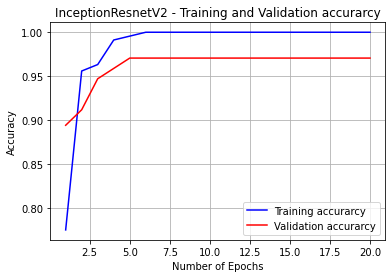

In [186]:
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('InceptionResnetV2 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Accuracy.png")

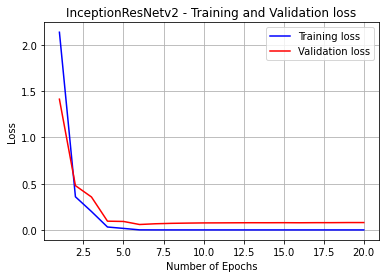

In [187]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('InceptionResNetv2 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Loss.png")